In [1]:
from abc import ABC, abstractmethod
%run Synth.ipynb
%run AutodockVina.ipynb

In [2]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import pandas

In [3]:
class SingleReward(ABC):
    
    @abstractmethod
    def giveReward(self,mol):
        pass
    
    @abstractmethod
    def name(self):
        pass
    

In [4]:
class DockReward(SingleReward):
    def __init__(self,receptor_path):
        self.reward_list = []
        self.vinaWrapper = VinaWrapper(receptor_path)
        
    def name(self):
        return "DockReward"
    
    def rescale(self,value):
        return (-1*value) / 4
    
    def giveReward(self,mol):
        smile = Chem.MolToSmile(mol)
        return self.rescale(self.vinaWrapper.CalculateEnergies())
        

In [5]:
class DiscWrapper():
    def __init__(self, in_dim, hidden_dim,lr):
        self.disc = GraphDiscriminator(in_dim, hidden_dim)
        self.optim = Adam(self.disc.parameters(), lr=lr,eps=1e-5, weight_decay=.001)
        
    def forward(self,x):
        return self.disc(x)
    
    
    def train(self,X,y):
        pass
    
    def train_on_batch(self, X, y):
        X_batch = dgl.batch(X)
        X_pred = self.disc(X_batch)
        print (X_pred.shape, y.shape)
        loss = nn.BCELoss()(X_pred, y)
        self.optim.zero_grad()
        loss.backward()
        self.optim.step()

In [6]:
class DiscReward(SingleReward):
    def __init__(self,path,in_dim,hidden_dim,lr):
        self.reward_list = []
        self.loss = []
        self.discWrapper = DiscWrapper(in_dim,hidden_dim,lr)
    
    def name(self):
        return "DiscReward"
    
    def train(self, X, y):
        
        self.discWrapper.train_on_batch(X,y)
    
    def giveReward(self,mol):
        graph = mol_to_graph(mol)
        return self.discWrapper.disc(graph)

In [7]:
class SizeSynth_norm(SingleReward):
    '''module for calculating SA score while hopefully not incentivizing degenerate solutions'''
    def __init__(self,size_importance=1, synth_importance=1):
        self.synth_model = sascorer
        self.reward_list = []
        self.synth_importance = synth_importance
        self.size_importance = size_importance
        
    def name(self):
        return ("SA score with size incentive ")
    
    def giveReward(self,mol):
        Chem.SanitizeMol(mol)
        synth_reward_norm = torch.sigmoid(torch.tensor(-(self.synth_model.calculateScore(mol) - 3.5)))#^(1/self.synth_importance)
        size_reward_norm = torch.sigmoid(torch.tensor(mol.GetNumAtoms()-20))#^(1/self.size_importance)
        
        product = synth_reward_norm*size_reward_norm #[0,1]
        product_norm = (product*3)-3
                
        return product_norm
        

In [8]:
class SizeReward(SingleReward):
    def __init__(self):
        self.reward_list = []
        
    def name(self):
        return "SizeReward"
    
    def rescale(self,value):
        return value/4
    
    def giveReward(self,mol):
        return(len(mol.GetAtoms()))

In [9]:
class Synthesizability(SingleReward):
    '''
    reward module for synthesizability
    values seem to range from 0-7 with lower being better
    rescale to be in [-3,3] with flip
    '''
    def __init__(self):
        self.synth_model = sascorer
        self.reward_list = []
       
    
    def name(self):
        return "SynthReward"
        
    
    def rescale(self, value):
        value = (value - 3.5)*-.9
        return value
    
    def giveReward(self,mol):
        smile = Chem.MolToSmiles(mol)
        mol = Chem.MolFromSmiles(smile)
        reward = self.synth_model.calculateScore(mol)
        reward = self.rescale(reward)
        self.reward_list.append(reward)
        #print(smile,reward)
        return reward
    

In [10]:
class FinalRewardModule():
    '''reward function handling'''
    def __init__(self,writer,r_list):
        self.r_list = r_list
        self.writer = writer
        self.color = ['blue','orange','red','green','yellow']
        self.n_iter = 0
    
    def UpdateTrainingModules(self):
        pass

    def PlotRewards(self):
        for idx,SingleReward in enumerate(self.r_list):
            plt.plot(SingleReward.reward_list, label = SingleReward.name(),color = self.color[idx])
        plt.show()
        
        
    def GiveReward(self,mol):
        self.n_iter += 1
        mol.UpdatePropertyCache()
        #print(Chem.MolToSmiles(mol))
#         for atom in mol.GetAtoms():
#             try:
#                 atom.UpdatePropertyCache()
#             except:
#                 #print(Chem.MolToSmiles(mol))
#                 return -1
            
            
        rewards = 0
        for rewardObject in self.r_list:
            reward = rewardObject.giveReward(mol)
            self.writer.add_scalar(rewardObject.name(), reward, self.n_iter)
            rewards += reward
        
        return rewards
            
        
        
        
        
        
        

In [40]:
def rewardStatistic(rew, smiles, form):
    reward_list = []
    for smile in smiles:
        mol_rep = smile
        if form == 'mol':
            try:
                mol_rep = Chem.MolFromSmiles(smile)
            except:
                print(smile)
                
        try:
            reward_list.append(rew.giveReward(mol_rep))
        except:
            print(smile)
    plt.hist(reward_list,17)
    plt.show()
        

In [41]:
# drugs = pandas.read_csv('SmallDrug.csv',error_bad_lines=False,delimiter=';')
# smiles_values = drugs['Smiles'].values


In [6]:
# import dgl
# %run './MolUtils.ipynb'

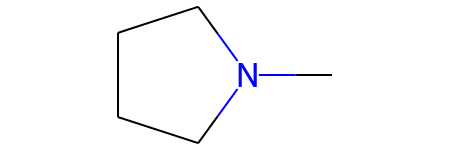

In [9]:
# batch = dgl.load_graphs('./graph_decomp/chunk_0')
# batch[0]
# MolFromGraphsFULL(batch[0][6])
# #rewardStatistic(SizeReward(),smiles_values,'mol')

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


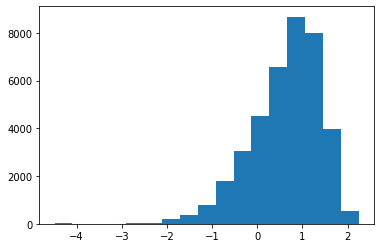

In [43]:
# rewardStatistic(Synthesizability(),smiles_values,'mol')

In [24]:
# smiles_values[0]

'CCCCC(=O)O.N'

In [ ]:
# rewardStatistic(SizeReward(),smiles_values,'mol')